In [1]:
import sys
import os
path = r'C:\Users\user\Documents\Master 1\Masterproef'
#r'gekopieerde link vanuit windows verkenner'
os.chdir(path)

In [2]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
pl.rcParams['axes.grid'] = True
np.random.seed(0)
import seaborn as sns

import pylab
import matplotlib
%matplotlib inline

import glob
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("All _Spots_statistics.csv",index_col=None, header=0, sep=';', dtype = {"POSITION_X" : np.float64, "POSITION_Y" : np.float64})
print(df.head())


     Label     ID  TRACK_ID  QUALITY  POSITION_X  POSITION_Y  POSITION_Z  \
0   ID5506   5506         0    0.910      677.39      679.40           0   
1   ID7609   7609         0    0.911      683.01      681.71           0   
2   ID3445   3445         0    0.805      685.47      683.98           0   
3   ID9690   9690         0    0.788      685.46      686.81           0   
4  ID14631  14631         0    0.837      689.01      689.48           0   

   POSITION_T  FRAME  RADIUS  ...    MANUAL_COLOR  MEAN_INTENSITY  \
0           0      0      10  ...       -10921639         147.364   
1           1      1      10  ...       -10921639         145.725   
2           2      2      10  ...       -10921639         146.092   
3           3      3      10  ...       -10921639         147.069   
4           4      4      10  ...       -10921639         148.968   

   MEDIAN_INTENSITY  MIN_INTENSITY  MAX_INTENSITY  TOTAL_INTENSITY  \
0               149             86            187         

In [4]:
df.sort_values("TRACK_ID")
print(df["TRACK_ID"].iloc[0])
print(df["POSITION_X"].iloc[0])

0
677.39


In [5]:
print(df.head(6))
print(df["POSITION_X"].unique())
print(type(df["POSITION_X"].iloc[0]))
print(type(df["TRACK_ID"].iloc[0]))

     Label     ID  TRACK_ID  QUALITY  POSITION_X  POSITION_Y  POSITION_Z  \
0   ID5506   5506         0    0.910      677.39      679.40           0   
1   ID7609   7609         0    0.911      683.01      681.71           0   
2   ID3445   3445         0    0.805      685.47      683.98           0   
3   ID9690   9690         0    0.788      685.46      686.81           0   
4  ID14631  14631         0    0.837      689.01      689.48           0   
5  ID11768  11768         0    0.724      692.85      686.53           0   

   POSITION_T  FRAME  RADIUS  ...    MANUAL_COLOR  MEAN_INTENSITY  \
0           0      0      10  ...       -10921639         147.364   
1           1      1      10  ...       -10921639         145.725   
2           2      2      10  ...       -10921639         146.092   
3           3      3      10  ...       -10921639         147.069   
4           4      4      10  ...       -10921639         148.968   
5           5      5      10  ...       -10921639    

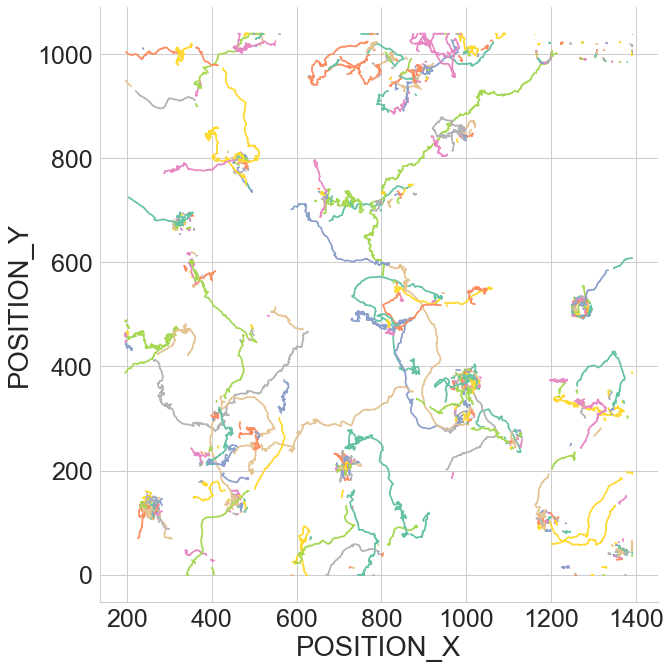

In [6]:
sns.set(style="whitegrid", font_scale = 2.5)
grid = sns.FacetGrid(df, size=10,  palette="Set2", hue="TRACK_ID")#geen col_wrap toevoegen als er maar 1 figuur is!
grid.map(plt.plot, "POSITION_X", "POSITION_Y", marker = "o", ms=1)



Normalize tracks to the origin of the system

In [6]:
df1 = pd.concat([df["POSITION_X"], df["POSITION_Y"], df["TRACK_ID"]], axis=1) #maak nieuwe dataframe met enkel x en y coördinaten
#axis=1 om alletwee de kolommen mee te nemen
#Concatenate pandas objects along a particular axis with optional set logic along the other axes.

In [7]:
print(df1.head(6))
type(df1["POSITION_X"].iloc[0])
print(df1["POSITION_X"].unique())

   POSITION_X  POSITION_Y  TRACK_ID
0      677.39      679.40         0
1      683.01      681.71         0
2      685.47      683.98         0
3      685.46      686.81         0
4      689.01      689.48         0
5      692.85      686.53         0
[ 677.39  683.01  685.47 ...,  803.52  803.87  263.04]


In [8]:
list_ = []
for track in df1.TRACK_ID.unique():
    df3 = df1[df1.TRACK_ID==track]
    df2 = df3.drop(["TRACK_ID"], axis=1).as_matrix()
    diff_df = df2 - df2[0]
    tracks_norm1 = pd.DataFrame(diff_df, columns = ["norm_x", "norm_y"])
    list_.append(tracks_norm1)
print(tracks_norm1.head())
print(df1.head())

   norm_x  norm_y
0    0.00    0.00
1   -3.24    4.43
   POSITION_X  POSITION_Y  TRACK_ID
0      677.39      679.40         0
1      683.01      681.71         0
2      685.47      683.98         0
3      685.46      686.81         0
4      689.01      689.48         0


In [10]:
list2 = pd.concat(list_)
print(list2.head())

list2 = list2.assign(TRACK_ID=df.TRACK_ID.values, POSITION_X=df.POSITION_X.values, FRAME = df.FRAME.values, 
                                  POSITION_Y=df.POSITION_Y.values)
print(list2.head(10))
print(list2)

   norm_x  norm_y
0    0.00    0.00
1    5.62    2.31
2    8.08    4.58
3    8.07    7.41
4   11.62   10.08
   norm_x  norm_y  FRAME  POSITION_X  POSITION_Y  TRACK_ID
0    0.00    0.00      0      677.39      679.40         0
1    5.62    2.31      1      683.01      681.71         0
2    8.08    4.58      2      685.47      683.98         0
3    8.07    7.41      3      685.46      686.81         0
4   11.62   10.08      4      689.01      689.48         0
5   15.46    7.13      5      692.85      686.53         0
6   20.33    7.79      6      697.72      687.19         0
7   30.29   11.96      7      707.68      691.36         0
8   31.39   16.50      8      708.78      695.90         0
9   33.82   22.22      9      711.21      701.62         0
    norm_x  norm_y  FRAME  POSITION_X  POSITION_Y  TRACK_ID
0     0.00    0.00      0      677.39      679.40         0
1     5.62    2.31      1      683.01      681.71         0
2     8.08    4.58      2      685.47      683.98         0
3  

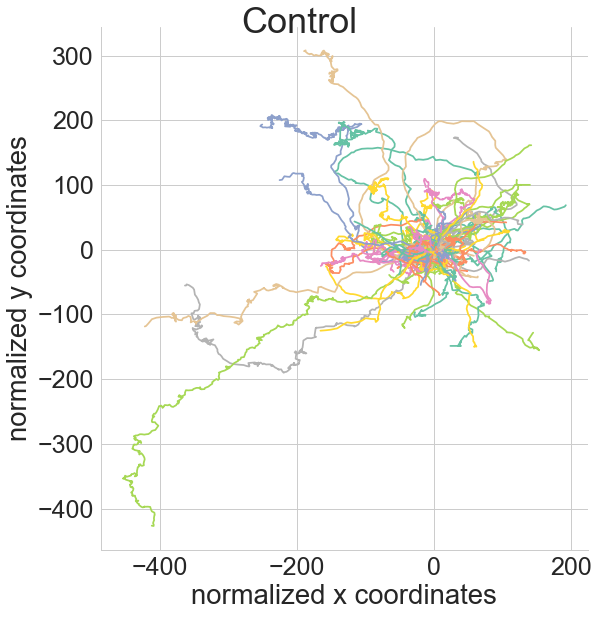

In [18]:
sns.set(style="whitegrid", font_scale=2.5)
grid = sns.FacetGrid(list2, size=9, palette='Set2', hue="TRACK_ID")
grid.map(plt.plot, 'norm_x', 'norm_y')
plt.subplots_adjust(top=0.95)
grid.fig.suptitle('Control')
grid.set_axis_labels('normalized x coordinates', 'normalized y coordinates')
plt.savefig("rosecontrol.png")

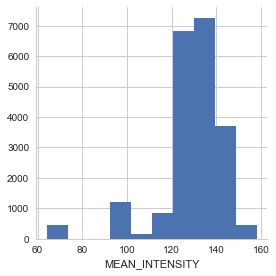

In [12]:
sns.set(style="whitegrid")
g = sns.FacetGrid(df, size = 4)
g.map(plt.hist, "MEAN_INTENSITY")

Compute motion displacements in the two directions, deltaX and deltaY.

Meer info, zie:
http://angel.elte.hu/cellmotility/stat.html

In [13]:
list_=[]
for track in df1.TRACK_ID.unique():
    df3 = df1[df1.TRACK_ID==track]
    df2 = df3.drop(["TRACK_ID"], axis=1).as_matrix()
    diff_df = np.diff(df2, axis = 0)
    diff_df = np.insert(diff_df, [0], [np.NaN, np.NaN], axis=0)
        
    diff_df = pd.DataFrame(diff_df, columns = ['delta_x', 'delta_y'])
    list_.append(diff_df)  
print(list_)


[    delta_x  delta_y
0       NaN      NaN
1      5.62     2.31
2      2.46     2.27
3     -0.01     2.83
4      3.55     2.67
5      3.84    -2.95
6      4.87     0.66
7      9.96     4.17
8      1.10     4.54
9      2.43     5.72
10     2.62     4.28
11     0.20     0.72
12     9.02     2.86
13     5.19    -0.71
14    -1.08    -0.20
15    -2.06    -0.26
16     0.71     5.08
17    -1.13    -0.62
18     2.85    -0.73
19     0.49    -0.66
20     3.04    -2.03
21     1.57     0.10
22     0.27    -0.69
23    -0.91    -0.61
24    -3.10    -0.14
25     3.76     4.18
26    -0.41     2.58
27     0.07    -0.14
28    -1.94     1.09
29    -2.92     1.34
..      ...      ...
43     2.52     4.05
44     2.47     3.28
45     5.81     1.28
46     8.60    -1.71
47     4.58     1.12
48     5.85    -0.91
49     4.20     0.17
50     3.55    -4.77
51     3.15     0.60
52     9.79     2.99
53     5.31     1.62
54     2.97    -1.49
55    -0.19    -0.70
56     2.25    -0.39
57     6.90    10.60
58    -0.83 

In [14]:
tracks_delta = pd.concat(list_)
print(tracks_delta)
#tracks_delta.reset_index()
print(tracks_delta)
#list2.reset_index()
print(list2)
tracks_delta = tracks_delta.assign(track_id=list2.TRACK_ID.values, frame=list2.FRAME.values, position_x=list2.POSITION_X.values, position_y=list2.POSITION_Y.values, 
                                  norm_x=list2.norm_x.values, norm_y=list2.norm_y.values)
print(tracks_delta.head())

    delta_x  delta_y
0       NaN      NaN
1      5.62     2.31
2      2.46     2.27
3     -0.01     2.83
4      3.55     2.67
5      3.84    -2.95
6      4.87     0.66
7      9.96     4.17
8      1.10     4.54
9      2.43     5.72
10     2.62     4.28
11     0.20     0.72
12     9.02     2.86
13     5.19    -0.71
14    -1.08    -0.20
15    -2.06    -0.26
16     0.71     5.08
17    -1.13    -0.62
18     2.85    -0.73
19     0.49    -0.66
20     3.04    -2.03
21     1.57     0.10
22     0.27    -0.69
23    -0.91    -0.61
24    -3.10    -0.14
25     3.76     4.18
26    -0.41     2.58
27     0.07    -0.14
28    -1.94     1.09
29    -2.92     1.34
..      ...      ...
1      0.00     0.00
2      0.00     0.00
0       NaN      NaN
1     -1.71    -0.92
2     -2.75    -0.07
3     -2.89     0.73
4     -0.37     1.02
5      0.37    -0.61
6     -1.77     1.17
0       NaN      NaN
1      0.84     0.18
2     -1.57    -4.95
3     -4.60     1.45
4      2.05     2.89
5     -1.09     1.64
0       NaN  

Compute the displacement deltaz: this is the Euclidean distance between two consecutive time points

deltaZ = sqrt(deltaX² + deltaY²).

In [15]:
print(df3.head())

       POSITION_X  POSITION_Y  TRACK_ID
20884      263.04      116.78       930
20885      259.80      121.21       930


In [16]:
list_=[]
import math
for track in df1.TRACK_ID.unique():
    df3 = df1[df1.TRACK_ID==track]
    df2 = df3.drop(["TRACK_ID"], axis=1).as_matrix()
    delta_z = np.apply_along_axis(lambda x: math.hypot(x[0], x[1]),1,df2) 
    df6 = pd.DataFrame(delta_z, columns = ['delta_z'])
    list_.append(df6)

In [17]:
tracks_final = pd.concat(list_)
tracks_final = tracks_final.assign(delta_x=tracks_delta.delta_x, delta_y = tracks_delta.delta_y,
                                   track_id=df.TRACK_ID.values, frame = df.FRAME.values, position_x=df.POSITION_X.values, position_y=df.POSITION_Y.values, 
                                  norm_x=list2.norm_x, norm_y=list2.norm_y)
                                 
print(tracks_final.head())

      delta_z  delta_x  delta_y  frame  norm_x  norm_y  position_x  \
0  959.396462      NaN      NaN      0    0.00    0.00      677.39   
1  965.003204     5.62     2.31      1    5.62    2.31      683.01   
2  968.347955     2.46     2.27      2    8.08    4.58      685.47   
3  970.341892    -0.01     2.83      3    8.07    7.41      685.46   
4  974.739683     3.55     2.67      4   11.62   10.08      689.01   

   position_y  track_id  
0      679.40         0  
1      681.71         0  
2      683.98         0  
3      686.81         0  
4      689.48         0  


Show the distribution of displacements

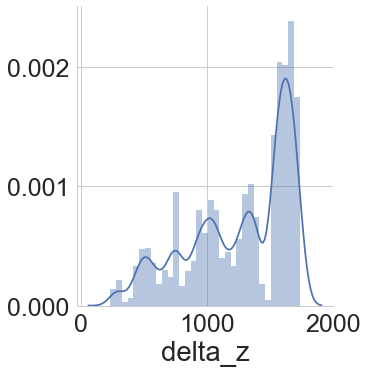

In [18]:
sns.set(style="whitegrid", font_scale=2.5)
g = sns.FacetGrid(tracks_final, size = 6)  
g.map(sns.distplot, "delta_z");

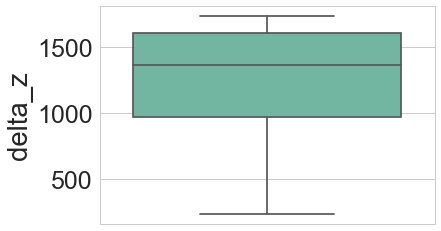

In [19]:
sns.boxplot(x=tracks_final["delta_z"], palette='Set2', orient='vertical')

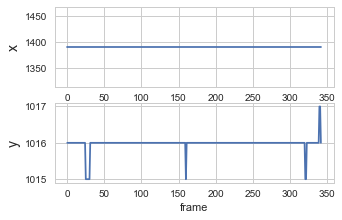

In [20]:
tmp = tracks_final[tracks_final["track_id"]==2]
#print(tmp)
sns.set(style="whitegrid", font_scale=1.0)
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(311)
plt.plot(tmp["frame"], tmp["position_x"])
plt.ylabel('x', fontsize=14)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(tmp["frame"], tmp["position_y"])
plt.ylabel('y', fontsize=14)
plt.xlabel('frame')

plt.show()

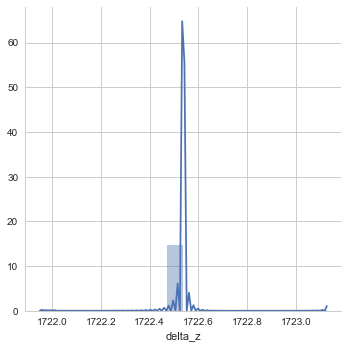

In [21]:
g = sns.FacetGrid(tmp, size=5)  
g.map(sns.distplot, "delta_z");

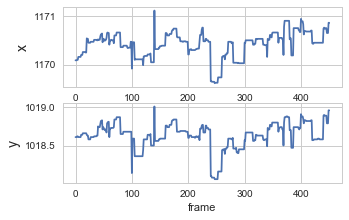

In [22]:
tmp = tracks_final[tracks_final["track_id"]==5]
#print(tmp)
sns.set(style="whitegrid", font_scale=1.0)
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(311)
plt.plot(tmp["frame"], tmp["position_x"])
plt.ylabel('x', fontsize=14)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(tmp["frame"], tmp["position_y"])
plt.ylabel('y', fontsize=14)
plt.xlabel('frame')

plt.show()

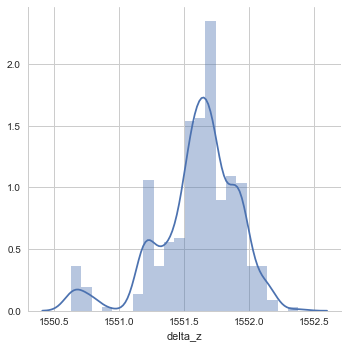

In [23]:
g = sns.FacetGrid(tmp, size=5)  
g.map(sns.distplot, "delta_z");

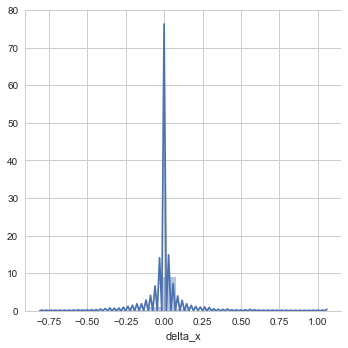

In [24]:
g = sns.FacetGrid(tmp, size=5)  
g.map(sns.distplot, "delta_x");

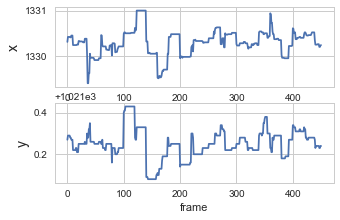

In [25]:
tmp = tracks_final[tracks_final["track_id"]==10]
#print(tmp)
sns.set(style="whitegrid", font_scale=1.0)
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(311)
plt.plot(tmp["frame"], tmp["position_x"])
plt.ylabel('x', fontsize=14)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(tmp["frame"], tmp["position_y"])
plt.ylabel('y', fontsize=14)
plt.xlabel('frame')

plt.show()

Render a polar histogram with distributions of turning angles

In [26]:
import math
df.reset_index()
list_= []
for track in df1.TRACK_ID.unique():
    df3 = df1[df1.TRACK_ID==track]
    df2 = df3.drop(["TRACK_ID"], axis=1).as_matrix()
    t_a = np.apply_along_axis(lambda x: math.atan2(x[0], x[1]),1,df2)
    df7 = np.column_stack((df2, t_a))
    df7 = pd.DataFrame(df7, columns = ['delta_x2', 'delta_y2', 'ta'])
    list_.append(df7)
#print(df7.shape())
print(len(list_))
print(len(list2))
tracks_ta = pd.concat(list_)
tracks_ta.reset_index()
tracks_ta = tracks_ta.assign(track_id = list2.TRACK_ID.values, frame = list2.FRAME.values, position_x = list2.POSITION_X.values,
                            position_y = list2.POSITION_Y.values, norm_x = list2.norm_x.values, norm_y = list2.norm_y.values,)
print(tracks_ta.head())

931
20886
   delta_x2  delta_y2        ta  frame  norm_x  norm_y  position_x  \
0    677.39    679.40  0.783917      0    0.00    0.00      677.39   
1    683.01    681.71  0.786351      1    5.62    2.31      683.01   
2    685.47    683.98  0.786486      2    8.08    4.58      685.47   
3    685.46    686.81  0.784414      3    8.07    7.41      685.46   
4    689.01    689.48  0.785057      4   11.62   10.08      689.01   

   position_y  track_id  
0      679.40         0  
1      681.71         0  
2      683.98         0  
3      686.81         0  
4      689.48         0  


In [27]:
N = 8 #number of bins
H = [np.histogram(tracks_ta.ta.dropna(), bins = N)]
hist_ = []
bins_ = [] 
for his in H:
    hist_.append(his[0])
    bins_.append(his[1])
    

b_ = []
for x in bins_:
    b = x[0:N]
    b_.append(b)
    
    
w_ = []
for b in bins_:
    w = [t - s for s, t in zip(b, b[1:])]
    w_.append(w)

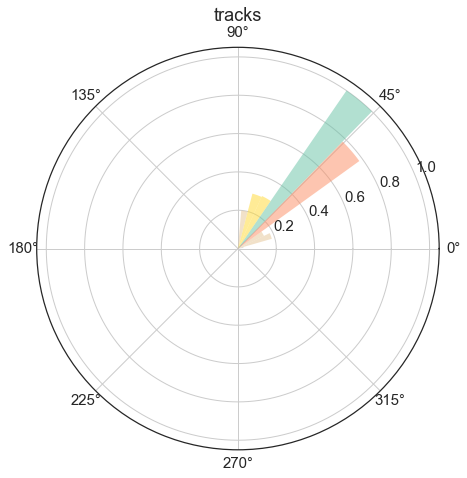

In [28]:
sns.set(style="white", font_scale=1.5)
g = sns.FacetGrid(df1, size=50, aspect=0.5)

nrows = int(math.ceil(len(b_) / 2.))
for ax in g.axes.flat:
    
    for i in range(len(b_)):
        theta = b_[i]
        radii = hist_[i]/max(hist_[i])
        width = w_[i]
        
        ax2 = plt.subplot(nrows, 4, i+1, projection='polar')
        bars = ax2.bar(theta, radii, width, bottom=0.0)
        ax2.set_title("tracks")
        
        for r,bar in zip(radii, bars):
            bar.set_facecolor(plt.cm.Set2_r(r))
            bar.set_alpha(0.5)
            
plt.tight_layout()

Convert radians to positive angles

In [29]:
def to_deg(angle):
    if angle == 'nan':
        return float('nan')
    elif angle > 0:
        return math.degrees(angle)
    else:
        return math.degrees(angle) + 360

In [30]:
tracks_ta['ta_deg'] = tracks_ta.ta.apply(to_deg)
print(tracks_ta.head())

   delta_x2  delta_y2        ta  frame  norm_x  norm_y  position_x  \
0    677.39    679.40  0.783917      0    0.00    0.00      677.39   
1    683.01    681.71  0.786351      1    5.62    2.31      683.01   
2    685.47    683.98  0.786486      2    8.08    4.58      685.47   
3    685.46    686.81  0.784414      3    8.07    7.41      685.46   
4    689.01    689.48  0.785057      4   11.62   10.08      689.01   

   position_y  track_id     ta_deg  
0      679.40         0  44.915120  
1      681.71         0  45.054579  
2      683.98         0  45.062339  
3      686.81         0  44.943634  
4      689.48         0  44.980465  


Text(0.5,0.98,'Turning angle (degrees)')

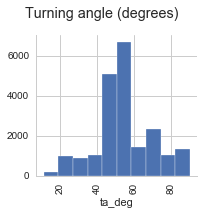

In [31]:
sns.set(style="whitegrid", font_scale=1.0)

grid = sns.FacetGrid(tracks_ta, size=3, palette=sns.color_palette('Paired', 10), sharey=False,)
grid.map(plt.hist, 'ta_deg', bins = 10, edgecolor='white')
grid.set_xticklabels(rotation=90)
plt.subplots_adjust(top=0.85)
grid.fig.suptitle('Turning angle (degrees)')

In [37]:
#path = r'C:\Users\user\Documents\Master 1\Masterproef\2017-06-19 CMSO neutrophil migration analysis\untracked videos'
links_ctr = pd.read_csv("Links in tracks statistics_ctr.csv",index_col=None, header=0, sep=';')
spots_ctr = pd.read_csv("Spots in tracks statistics_ctr.csv", index_col=None, header=0, sep=';')
print("Links")
print(links_ctr.head())
print("Spots")
print(spots_ctr.head())

Links
                    Label  TRACK_ID  SPOT_SOURCE_ID  SPOT_TARGET_ID  \
0  1  (ID10626 : ID10865)         6           10626           10865   
1  2  (ID10865 : ID10743)         6           10865           10743   
2  3  (ID10743 : ID10504)         6           10743           10504   
3  4  (ID10504 : ID11116)         6           10504           11116   
4  5  (ID11116 : ID10989)         6           11116           10989   

   LINK_COST  EDGE_TIME EDGE_X_LOCATION EDGE_Y_LOCATION  EDGE_Z_LOCATION  \
0     16.874        0.5          20.029         404.693                0   
1     25.226        1.5          19.375         401.093                0   
2     46.591        2.5          15.320         396.775                0   
3     72.154        3.5          15.853         391.172                0   
4     57.183        4.5          20.328         384.622                0   

   VELOCITY  DISPLACEMENT MANUAL_COLOR  
0     4.108         4.108         None  
1     5.023         5.023   

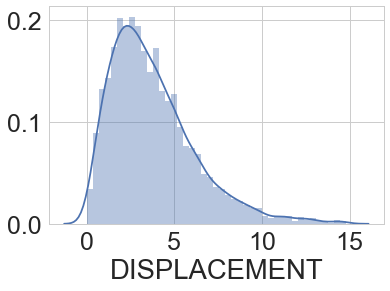

In [41]:
velocity = links_ctr["VELOCITY"]
displacement = links_ctr["DISPLACEMENT"]
sns.set(style="whitegrid", font_scale=2.5)

sns.distplot(displacement)

AxesSubplot(0.125,0.125;0.775x0.755)


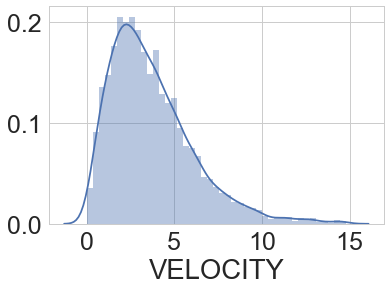

In [40]:
print(sns.distplot(velocity))

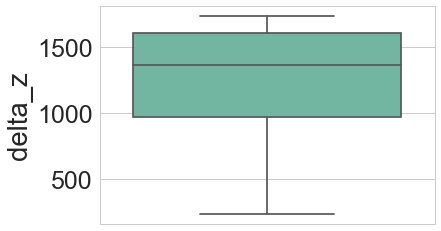

In [43]:
sns.boxplot(x=tracks_final["delta_z"], palette = "Set2", orient = "vertical")

In [46]:
tracks_ctr = pd.read_csv("Track statistics_ctr.csv",header=0, index_col=None, sep=";")
print(tracks_ctr.head())

         Label  NUMBER_SPOTS  NUMBER_GAPS  LONGEST_GAP  NUMBER_SPLITS  \
0  1   Track_6            42            0            0              0   
1  2   Track_7           104            0            0              0   
2  3   Track_8            15            0            0              0   
3  4  Track_11            22            0            0              0   
4  5  Track_14            38            0            0              0   

   NUMBER_MERGES  NUMBER_COMPLEX  TRACK_DURATION  TRACK_START  \
0              0               0              41            0   
1              0               0             103            0   
2              0               0              14            1   
3              0               0              21            0   
4              0               0              37            0   

         ...          TRACK_MEAN_SPEED  TRACK_MAX_SPEED  TRACK_MIN_SPEED  \
0        ...                     4.766           12.475            0.481   
1        ...      

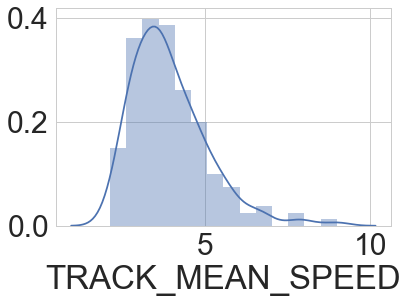

In [47]:
meanspeed = tracks_ctr["TRACK_MEAN_SPEED"]
sns.set(style="whitegrid", font_scale=3)
sns.distplot(meanspeed)

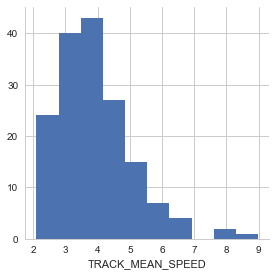

In [51]:
sns.set(style="whitegrid")
g = sns.FacetGrid(tracks_ctr, size=4)
g.map(plt.hist, "TRACK_MEAN_SPEED")

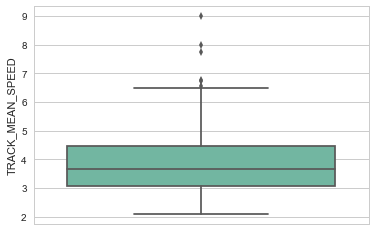

In [52]:
sns.boxplot(x=meanspeed, palette = "Set2", orient="vertical")

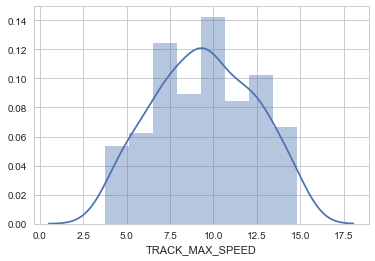

In [54]:
maxspeed = tracks_ctr["TRACK_MAX_SPEED"]
sns.distplot(maxspeed)

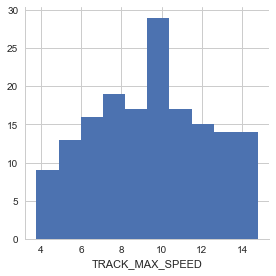

In [55]:
sns.set(style="whitegrid")
g = sns.FacetGrid(tracks_ctr, size=4)
g.map(plt.hist, "TRACK_MAX_SPEED")

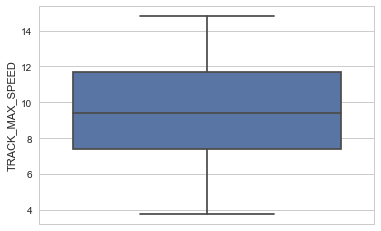

In [56]:
sns.boxplot(x=maxspeed, orient="vertical")